In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

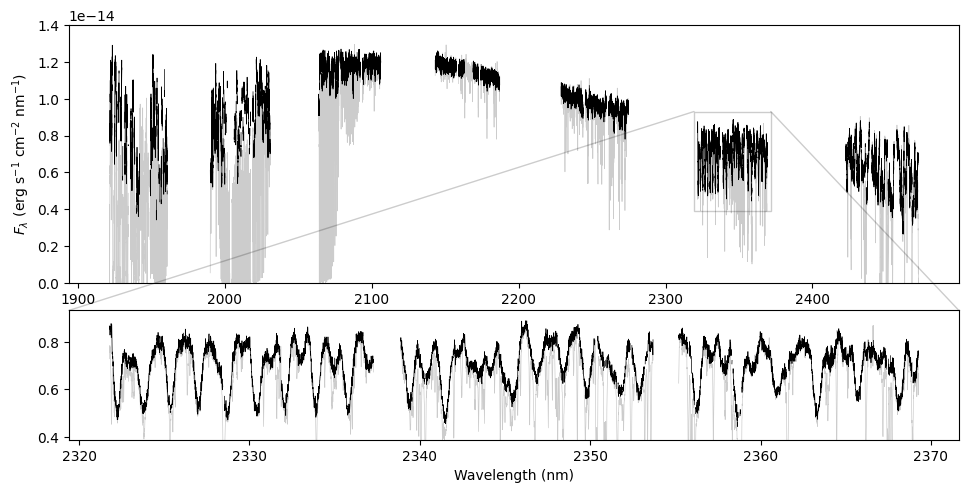

In [2]:
data_path = '/home/sam/Documents/PhD/CRIRES_data_reduction/retrieval_base/DENIS_J0255/retrieval_outputs/DENIS_J0255_retrieval_outputs_187/test_data'

d_flux   = np.load(f'{data_path}/d_spec_flux.npy')
d_err    = np.load(f'{data_path}/d_spec_err.npy')
d_wave   = np.load(f'{data_path}/d_spec_wave.npy')
d_transm = np.load(f'{data_path}/d_spec_transm.npy')

d_flux_uncorr = np.load(f'{data_path}/d_spec_flux_uncorr.npy')

#d_transm /= 1.03*np.nanmedian(d_transm)

alpha_uncorr = 0.2

fig, ax = plt.subplots(
    figsize=(10,5), nrows=2, #sharex=True, 
    gridspec_kw={
        'hspace':0.14, 'height_ratios':[1,0.5], 
        'left': 0.08, 'right': 0.97, 'top':0.94, 'bottom':0.11
        }, 
    )

ax[0].plot(
    d_wave.flatten(), d_flux.flatten(), c='k', lw=0.5, 
    #label='Tellurics-corrected'
    )
ax[0].plot(
    d_wave.flatten(), d_flux_uncorr.flatten(), 
    c='k', lw=0.5, alpha=alpha_uncorr, 
    #label='Spectrum with tellurics'
    )

order_for_zoom_in = 5
#'''
ax[1].plot(
    d_wave[order_for_zoom_in].flatten(), 
    d_flux_uncorr[order_for_zoom_in].flatten(), 
    c='k', lw=0.5, alpha=alpha_uncorr
    )
#'''
ax[1].plot(
    d_wave[order_for_zoom_in].flatten(), 
    d_flux[order_for_zoom_in].flatten(), 
    c='k', lw=0.5
    )

ax[0].set(
    ylabel=r'$F_\lambda\ (\mathrm{erg\ s^{-1}\ cm^{-2}\ nm^{-1}})$', 
    ylim=(0,1.4e-14)
    )
ax[1].set(
    xlabel=r'Wavelength (nm)', 
    yticks=np.arange(0.0,1.4e-14,0.2e-14), 
    yticklabels=np.round(np.arange(0.0,1.4e-14,0.2e-14)/1e-14, 1), 
    #yticks=ax[1].get_yticks(), 
    #yticklabels=np.round(ax[1].get_yticks()/1e-14,1), 
    ylim=(0.39e-14,0.93e-14), 
    )

x0 = ax[1].get_xlim()[0]
y0 = ax[1].get_ylim()[0]
width  = np.abs(ax[1].get_xlim()[1] - x0)
height = np.abs(ax[1].get_ylim()[1] - y0)
bounds = (x0, y0, width, height)

#ax[0].legend(loc='upper right')
#ax[0].indicate_inset_zoom(ax[1], bounds=bounds, edgecolor='k', alpha=0.2)
ax[0].indicate_inset(bounds=bounds, inset_ax=ax[1], edgecolor='k', alpha=0.2)

fig.savefig('./plots/spectrum.pdf')
plt.show()
plt.close(fig)

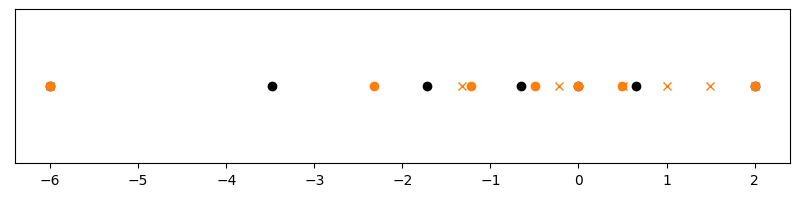

In [76]:
def get_log_P_knots(log_P_0=1, w=1.7):

    log_P_knots = np.array([-6,2])

    log_P_knots_exp = -np.exp(np.array([0,1,2,3])/w) + np.exp(0)
    log_P_knots_exp = np.concatenate(([-log_P_knots_exp[1]], log_P_knots_exp))
    log_P_knots_exp += log_P_0

    #log_P_knots_exp = log_P_knots_exp[::-1]

    #log_P_knots = np.insert(log_P_knots, 1, log_P_knots_exp)
    log_P_knots = np.concatenate(([2], log_P_knots_exp, [-6]))

    return log_P_knots

plt.figure(figsize=(10,2))
plt.plot(get_log_P_knots(log_P_0=0, w=2.), np.zeros(7), 'ko')
plt.plot(get_log_P_knots(log_P_0=0, w=2.5), np.zeros(7), 'C1o')
plt.plot(get_log_P_knots(log_P_0=1, w=2.5), np.zeros(7), 'C1x')
plt.gca().invert_yaxis()
plt.yticks([])
plt.show()